In [86]:
import cellpylib as cpl
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.colors import ListedColormap

In [322]:
def show_plt(func_animation, name="animation.gif"):
    func_animation.save(name, writer='imagemagick', fps=10)
    os.system('gio open '+name)
    return func_animation

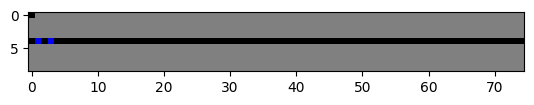

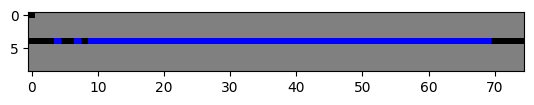

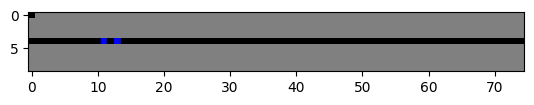

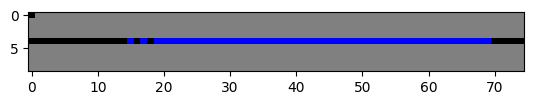

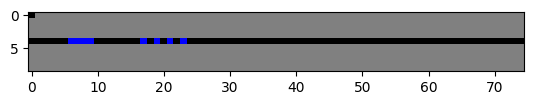

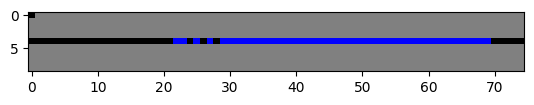

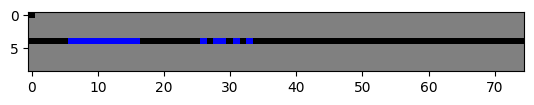

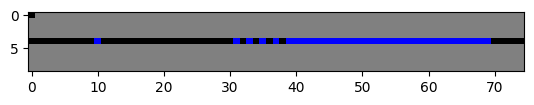

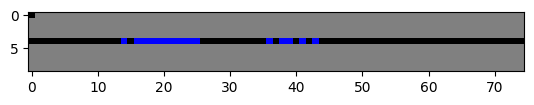

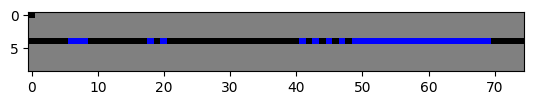

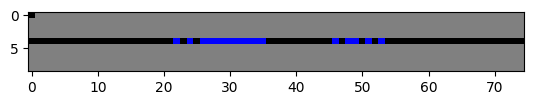

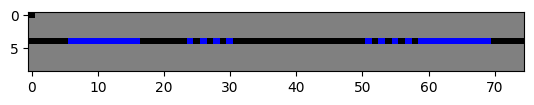

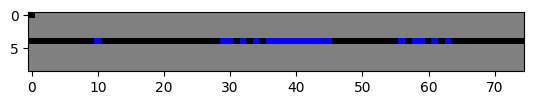

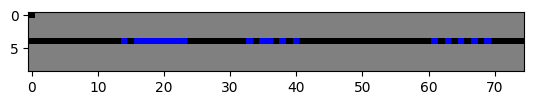

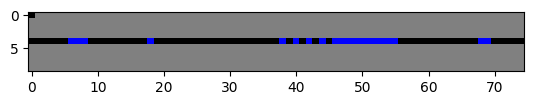

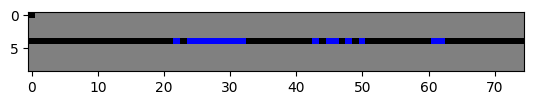

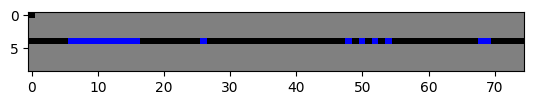

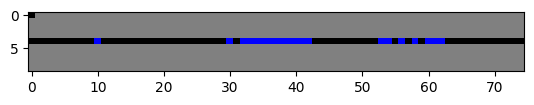

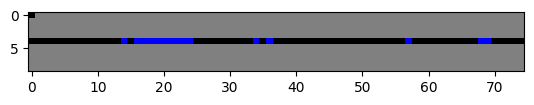

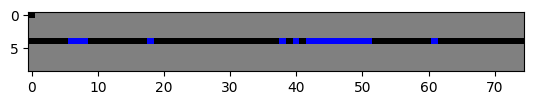

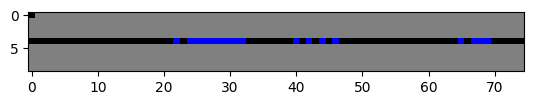

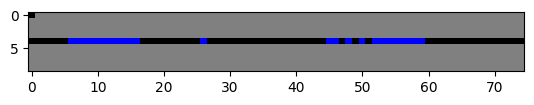

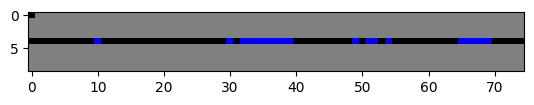

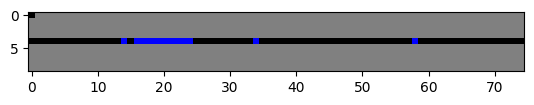

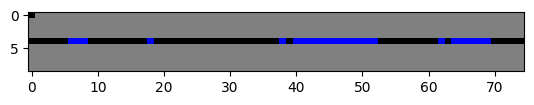

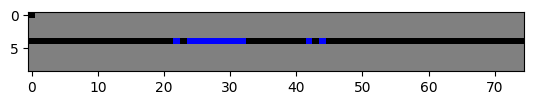

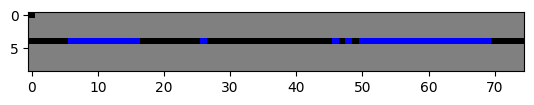

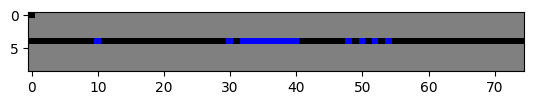

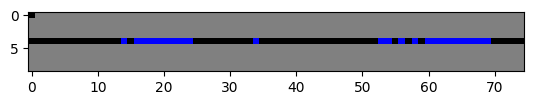

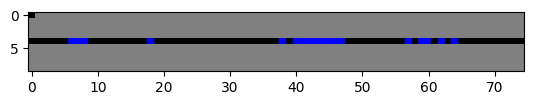

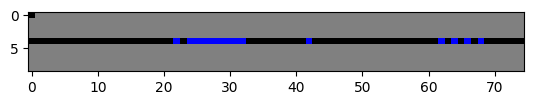

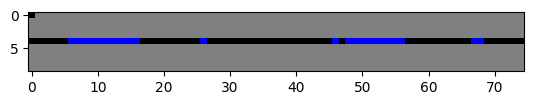

In [327]:
class el:
    BACKGROUND = 0,
    ROAD = 1,
    CAR = 2

def ns_movement_rule(
        n, # neighborhood
        c, # cell
        t  # time step
    ):
    x, y = tuple([i//2 for i in n.shape])
    
    # if n[x][y-1] == 2:
    #     return 2

    def d_i():
        d_i = n[x, y+1:]
        aw = np.argwhere(d_i == 2)
        return aw[0,0] if len(aw) > 0 else len(d_i)

    v_i = cars.get((c[0],c[1]))
    if v_i is not None: # if there is a car
        # 1)
        v_i = min(v_i + 1, v_max)
        # 2)
        v_i = max(v_i, d_i())
        # 3)
        if np.random.rand() > 0.5:
            v_i = max(v_i - 1, 0)
        # 4)
        cars.pop((c[0],c[1]))
        cars.update({(c[0],c[1]+v_i): v_i})
        cars_for_update.append((c[0],c[1]+v_i))

    found = [car for car in cars_for_update if car == c]
    if len(found) > 1:
        print("ERROR")
    for car in found:
        cars_for_update.remove(car)
        return 2
    
    # na tej pozycji było auto
    if n[x][y] == 2:
        return 1

    return n[x][y]
    

def generate_road(length):
    road = np.zeros((1, 9, length), dtype=int)
    road[0, 4, :] = el.ROAD
    return road

v_max = 5

cellular_automata = generate_road(75)
cars = {}
cars_for_update = []
cellular_automata[0,0,0] = 1 # for color reference

def add_car(x, y, v):
    cellular_automata[0,x,y] = 2
    cars.update({(x,y): v})

add_car(4, 1, 2)
add_car(4, 3, 2)
# add_car(4, 20, 2)

cellular_automata = cpl.evolve2d(
    cellular_automata,
    timesteps=32,
    apply_rule=ns_movement_rule, 
    memoize=True,
    r=5
)


for i in range(len(cellular_automata)):  
    cpl.plot2d(cellular_automata, i,
    colormap=ListedColormap(["gray", "black", "blue"]))

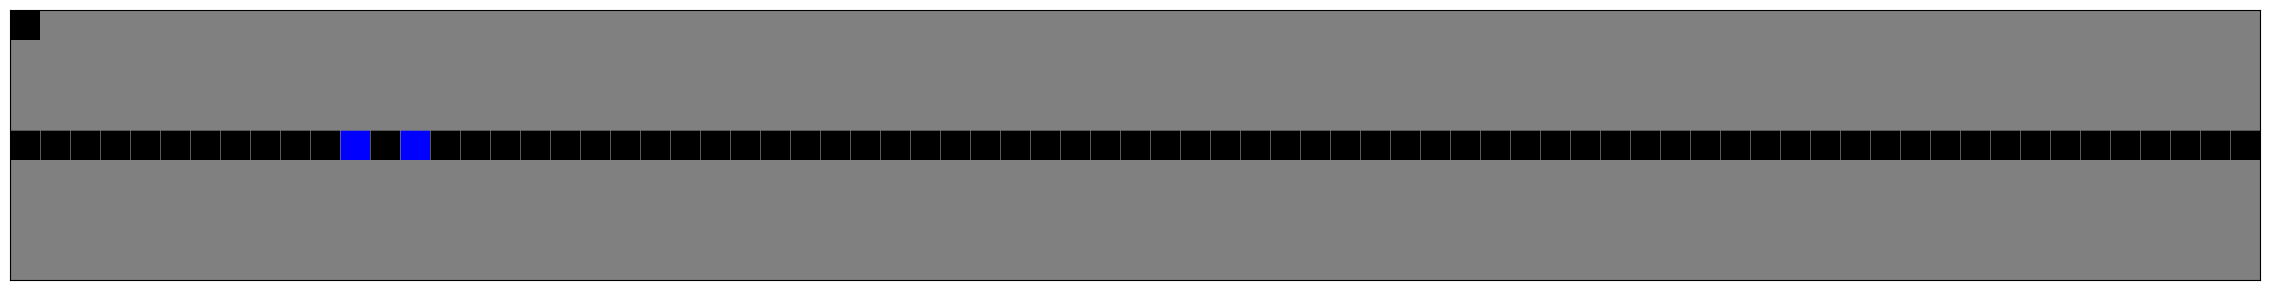

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/m_zsuetam/snap/code/common/.cache/gio-modules/libgiolibproxy.so
Gtk-Message: 21:26:09.424: Failed to load module "xapp-gtk3-module"


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


In [328]:
anim = cpl.plot2d_animate(
    cellular_automata, 
    show_grid=True, 
    show_margin=False, 
    scale=0.3,
    colormap=ListedColormap(["gray", "black", "blue"])
)

show_plt(anim, "animation-2.gif")
